In [1]:
#Loading liabraries used
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
assay = pd.read_csv('C:/Users/chaukt1/Desktop/Assay.csv')

In [3]:
assay.head()

,Hole_ID,Depth_From (m),Depth_To (m),TCo (%),target
0,KRED207,33.5,34.3,0.086,1
1,KRED207,34.3,35.0,0.223,1
2,KRED207,35.0,35.8,0.174,1
3,KRED207,35.8,36.5,0.065,1
4,KRED207,36.5,37.3,0.100,1


In [4]:
assay.shape

(4717, 5)

In [5]:
assay.dtypes

Hole_ID            object
Depth_From (m)    float64
Depth_To (m)      float64
TCo (%)           float64
target              int64
dtype: object

In [6]:
assay.isna().any()

Hole_ID           False
Depth_From (m)    False
Depth_To (m)      False
TCo (%)           False
target            False
dtype: bool

In [7]:
assay.columns

Index(['Hole_ID', 'Depth_From (m)', 'Depth_To (m)', 'TCo (%)', 'target'], dtype='object')

In [8]:
from sdv.constraints import FixedCombinations

In [9]:
Location = FixedCombinations(column_names=['Depth_From (m)', 'Depth_To (m)', 'TCo (%)'])

In [10]:
constraints = [Location]

In [11]:
from sdv.tabular import CTGAN

In [12]:
batch_size = 1000
epochs = 100

model = CTGAN(primary_key='Hole_ID',constraints=constraints, generator_dim=(256, 256, 256),
              discriminator_dim=(256, 256, 256), batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(assay)

Epoch 1, Loss G:  8.4918,Loss D:  0.0005
Epoch 2, Loss G:  8.4692,Loss D: -0.0067
Epoch 3, Loss G:  8.4717,Loss D: -0.0173
Epoch 4, Loss G:  8.4516,Loss D: -0.0059
Epoch 5, Loss G:  8.4500,Loss D: -0.0031
Epoch 6, Loss G:  8.4497,Loss D: -0.0080
Epoch 7, Loss G:  8.4389,Loss D:  0.0059
Epoch 8, Loss G:  8.4097,Loss D:  0.0116
Epoch 9, Loss G:  8.4373,Loss D:  0.0077
Epoch 10, Loss G:  8.4190,Loss D: -0.0105
Epoch 11, Loss G:  8.4210,Loss D: -0.0073
Epoch 12, Loss G:  8.4105,Loss D:  0.0146
Epoch 13, Loss G:  8.3861,Loss D:  0.0269
Epoch 14, Loss G:  8.3946,Loss D:  0.0098
Epoch 15, Loss G:  8.4133,Loss D: -0.0066
Epoch 16, Loss G:  8.3941,Loss D: -0.0262
Epoch 17, Loss G:  8.3617,Loss D: -0.0066
Epoch 18, Loss G:  8.3500,Loss D:  0.0113
Epoch 19, Loss G:  8.3515,Loss D:  0.0157
Epoch 20, Loss G:  8.3367,Loss D:  0.0160
Epoch 21, Loss G:  8.3802,Loss D: -0.0085
Epoch 22, Loss G:  8.3679,Loss D: -0.0191
Epoch 23, Loss G:  8.3782,Loss D: -0.0106
Epoch 24, Loss G:  8.2840,Loss D:  0.0138
E

In [13]:
new_assay = 4717
new_assay = model.sample(new_assay)

Sampling rows: 100%|██████████| 4717/4717 [00:02<00:00, 1599.97it/s]


In [14]:
from sdv.evaluation import evaluate

In [15]:
from sdv.evaluation import evaluate

evaluate(new_assay, assay)

0.4482192071231715

In [16]:
from table_evaluator import load_data, TableEvaluator

In [17]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(assay, new_assay)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.3443   0.5572              0.2413
DecisionTreeClassifier_real   1.0000   0.6419              0.4727
LogisticRegression_fake       0.3443   0.6631              0.0069
LogisticRegression_real       0.9958   0.9481              0.8975
MLPClassifier_fake            0.6472   0.6631              0.8601
MLPClassifier_real            0.9767   0.9481              0.8638
RandomForestClassifier_fake   0.4481   0.5964              0.2688
RandomForestClassifier_real   1.0000   0.7701              0.6262

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.9368
nearest neighbor std                     0.1937

Miscellaneous results:
                                  Result
Column Cor

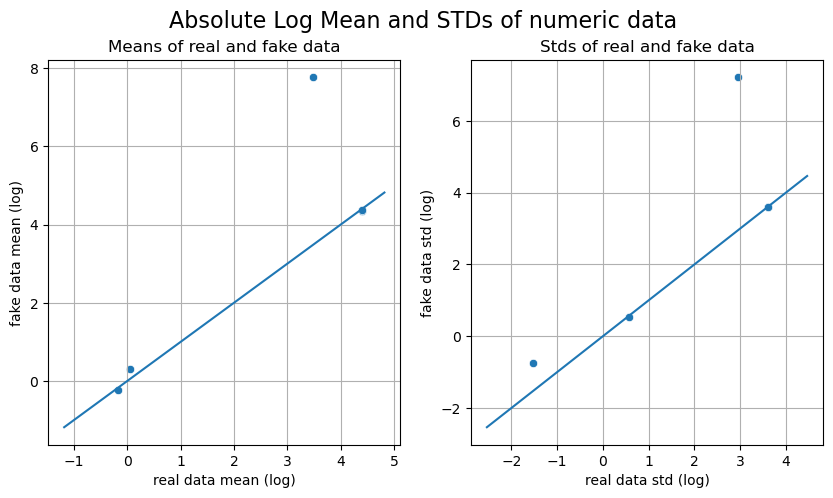

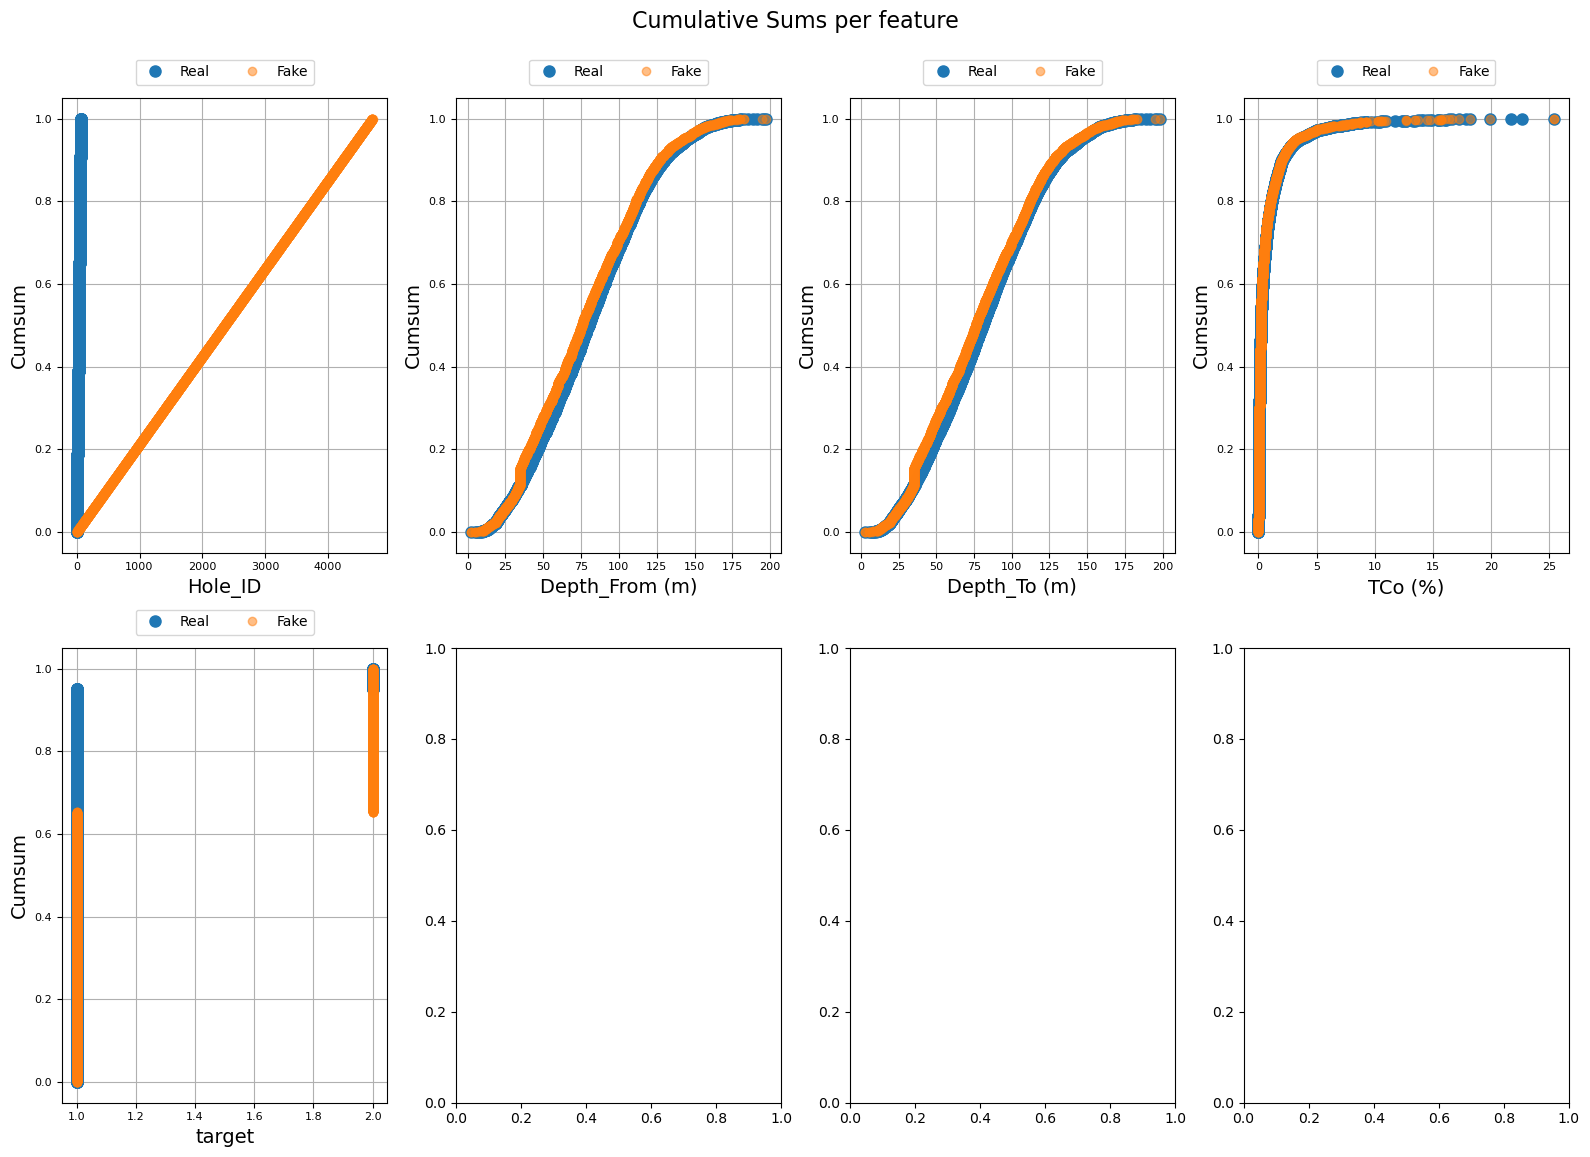

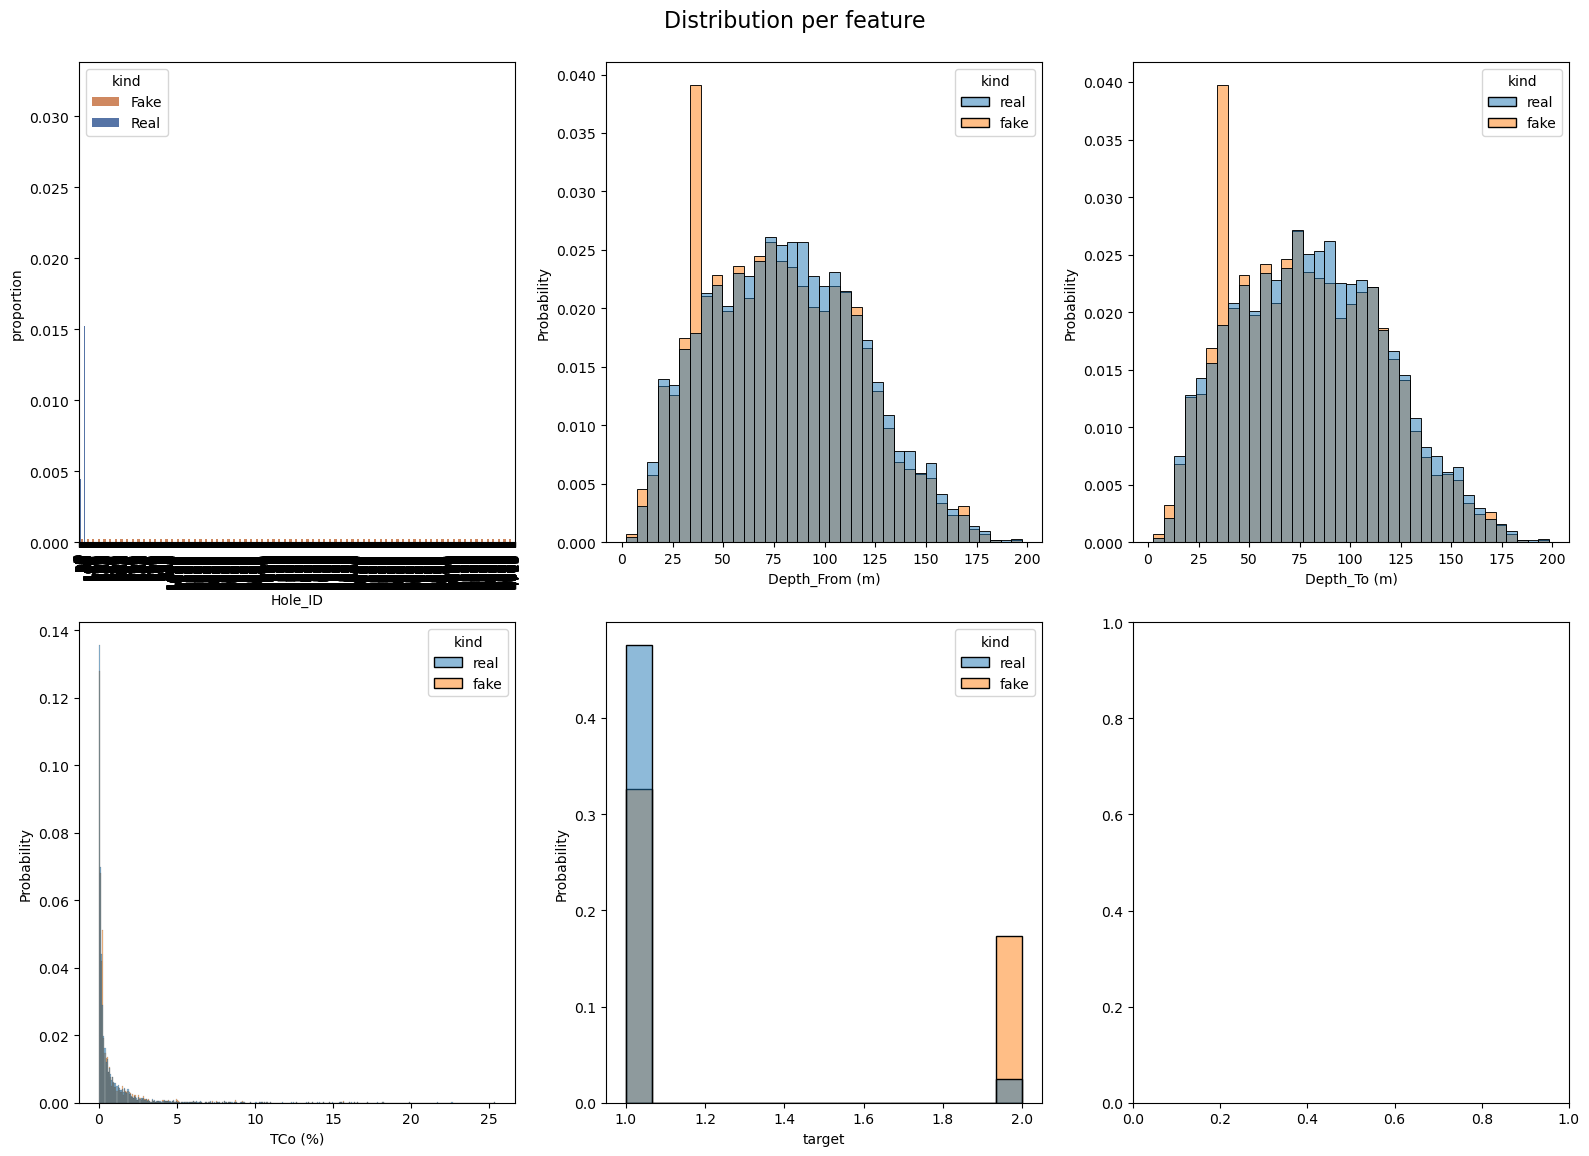

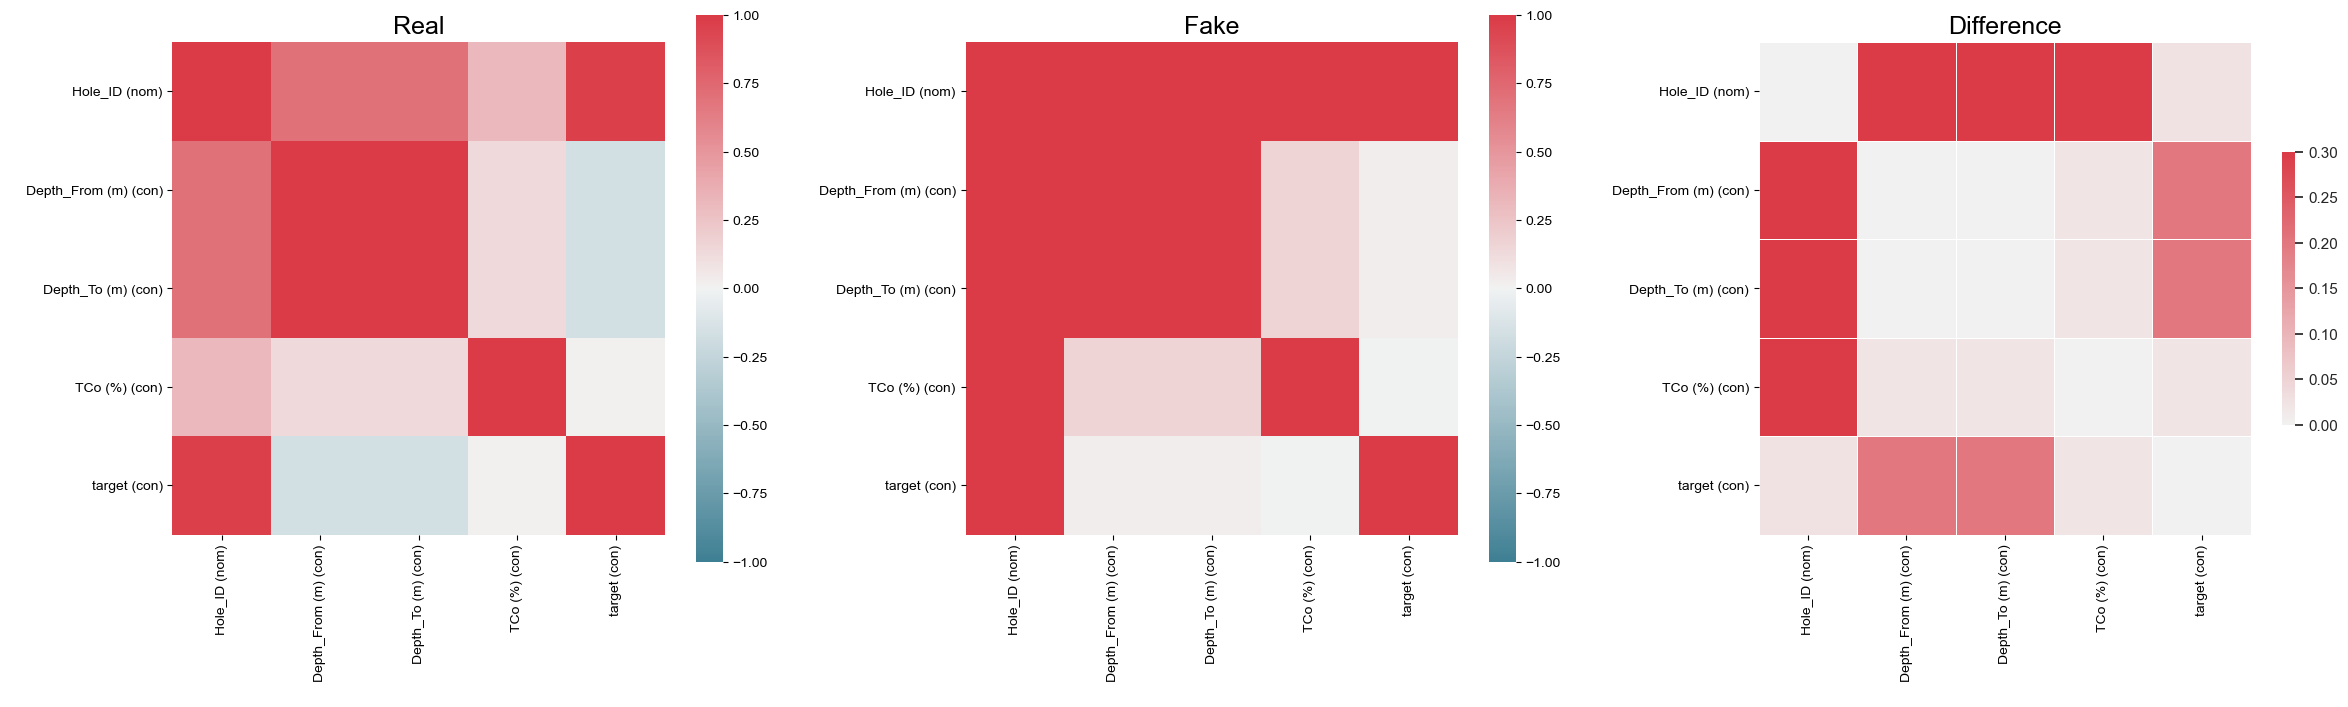

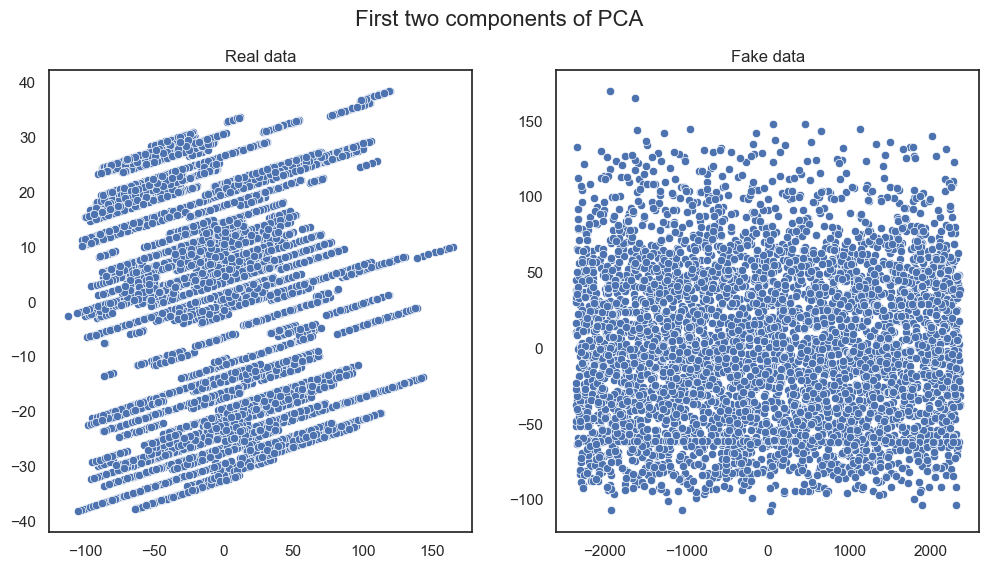

In [18]:
table_evaluator.visual_evaluation()

In [19]:
from sdv.tabular import CopulaGAN

In [20]:
model = CopulaGAN(primary_key='Hole_ID',
                 constraints=constraints,epochs=100,batch_size=2000,
                  generator_dim=(256, 256, 256),discriminator_dim=(256, 256, 256),verbose=True)
model.fit(assay)
new_data = model.sample(4717)
new_data.head()

Epoch 1, Loss G:  8.4229,Loss D: -0.0032
Epoch 2, Loss G:  8.4214,Loss D: -0.0019
Epoch 3, Loss G:  8.4157,Loss D: -0.0072
Epoch 4, Loss G:  8.4071,Loss D: -0.0139
Epoch 5, Loss G:  8.3993,Loss D: -0.0136
Epoch 6, Loss G:  8.3810,Loss D: -0.0074
Epoch 7, Loss G:  8.3707,Loss D: -0.0026
Epoch 8, Loss G:  8.3640,Loss D:  0.0016
Epoch 9, Loss G:  8.3731,Loss D: -0.0055
Epoch 10, Loss G:  8.3592,Loss D: -0.0072
Epoch 11, Loss G:  8.3609,Loss D: -0.0093
Epoch 12, Loss G:  8.3577,Loss D: -0.0064
Epoch 13, Loss G:  8.3494,Loss D: -0.0006
Epoch 14, Loss G:  8.3195,Loss D:  0.0054
Epoch 15, Loss G:  8.3131,Loss D:  0.0110
Epoch 16, Loss G:  8.3090,Loss D:  0.0116
Epoch 17, Loss G:  8.3092,Loss D:  0.0088
Epoch 18, Loss G:  8.3172,Loss D:  0.0026
Epoch 19, Loss G:  8.3146,Loss D: -0.0022
Epoch 20, Loss G:  8.3049,Loss D: -0.0173
Epoch 21, Loss G:  8.3080,Loss D: -0.0074
Epoch 22, Loss G:  8.3027,Loss D: -0.0036
Epoch 23, Loss G:  8.2976,Loss D:  0.0056
Epoch 24, Loss G:  8.2877,Loss D:  0.0177
E

Sampling rows: 100%|██████████| 4717/4717 [00:04<00:00, 1074.14it/s]


,Hole_ID,Depth_From (m),Depth_To (m),TCo (%),target
0,a,93.0000,93.3000,0.0440,1
1,b,102.5000,103.0000,2.6600,1
2,c,41.6000,42.5000,0.0230,1
3,d,59.0000,59.8000,0.6070,1
4,e,118.5000,119.5000,0.5260,1


In [21]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(assay, new_data)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0572   0.9121              0.0323
DecisionTreeClassifier_real   0.9989   0.8273              0.7040
LogisticRegression_fake       0.0572   0.9597              0.0085
LogisticRegression_real       0.9947   0.9566              0.9071
MLPClassifier_fake            0.9025   0.9597              0.8805
MLPClassifier_real            0.9725   0.9566              0.9129
RandomForestClassifier_fake   0.0572   0.9555              0.0107
RandomForestClassifier_real   0.9979   0.9523              0.9051

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.8911
nearest neighbor std                     0.2281

Miscellaneous results:
                                  Result
Column Cor

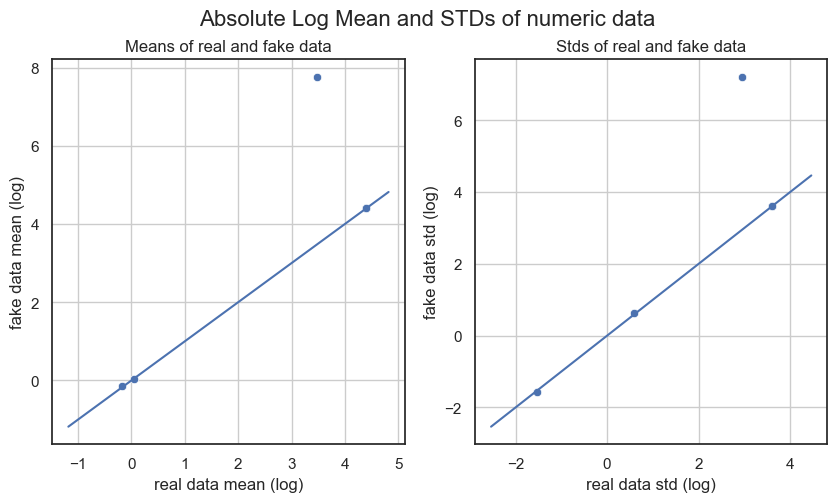

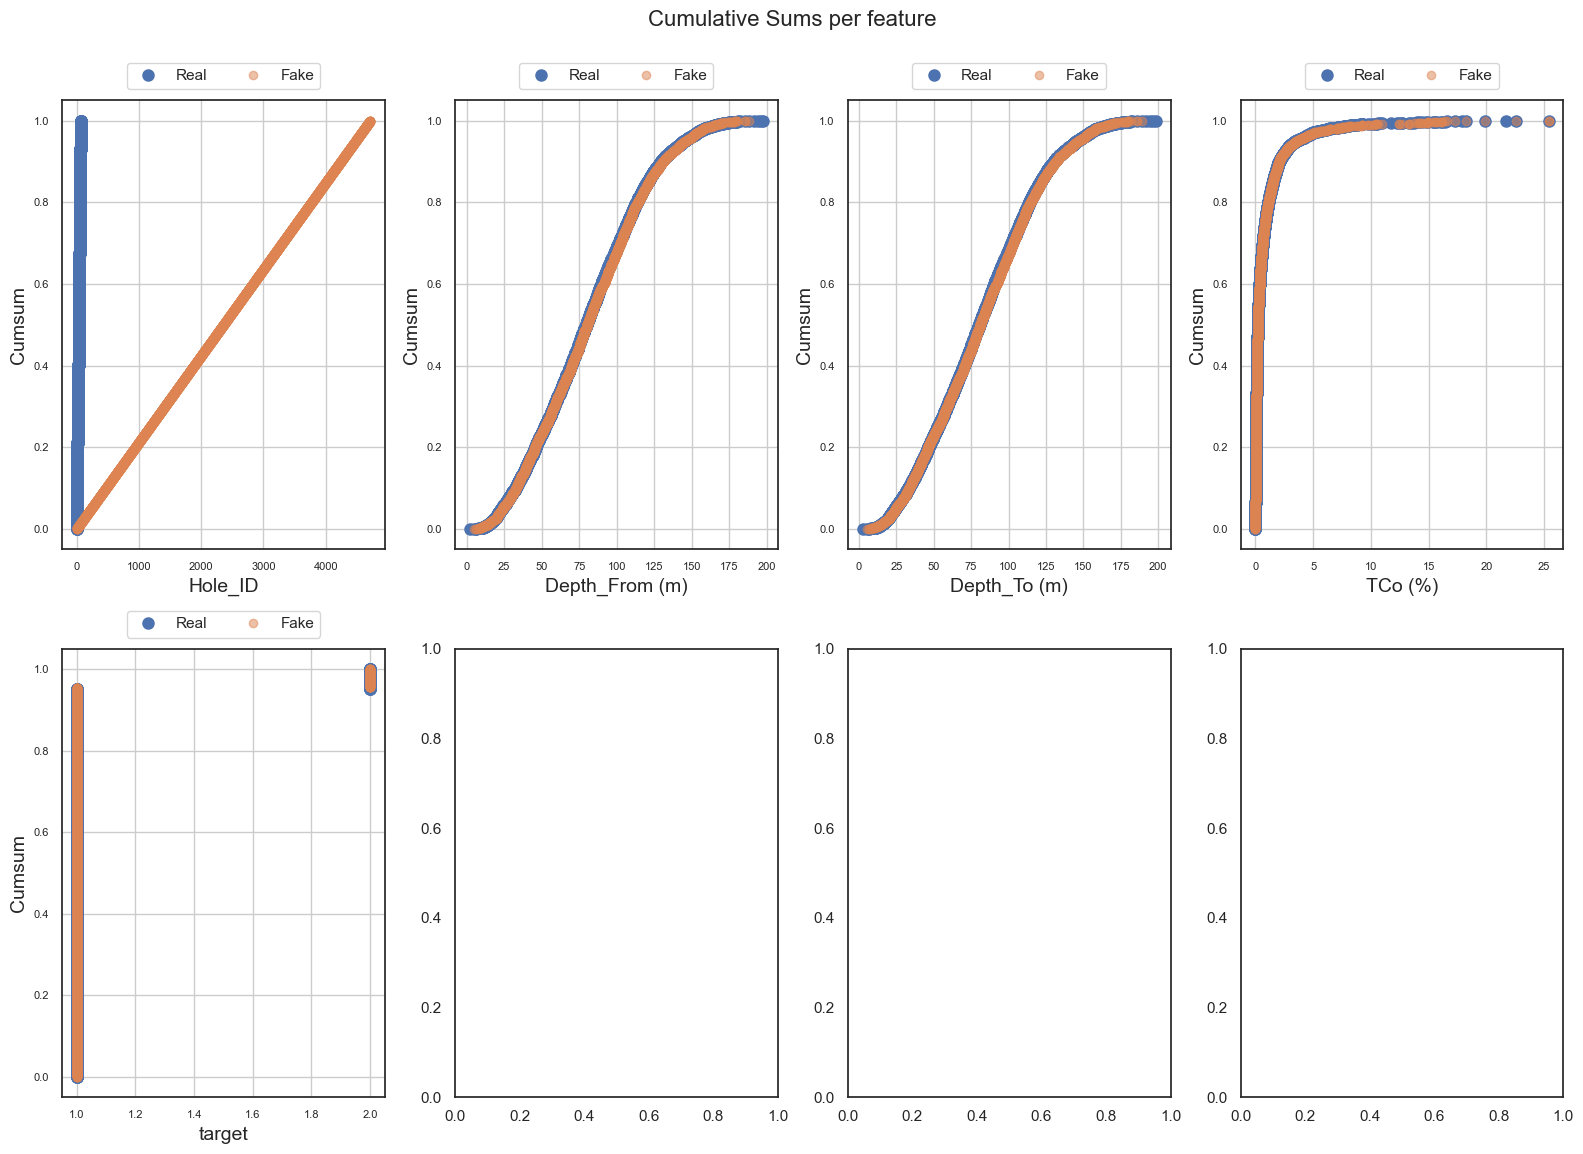

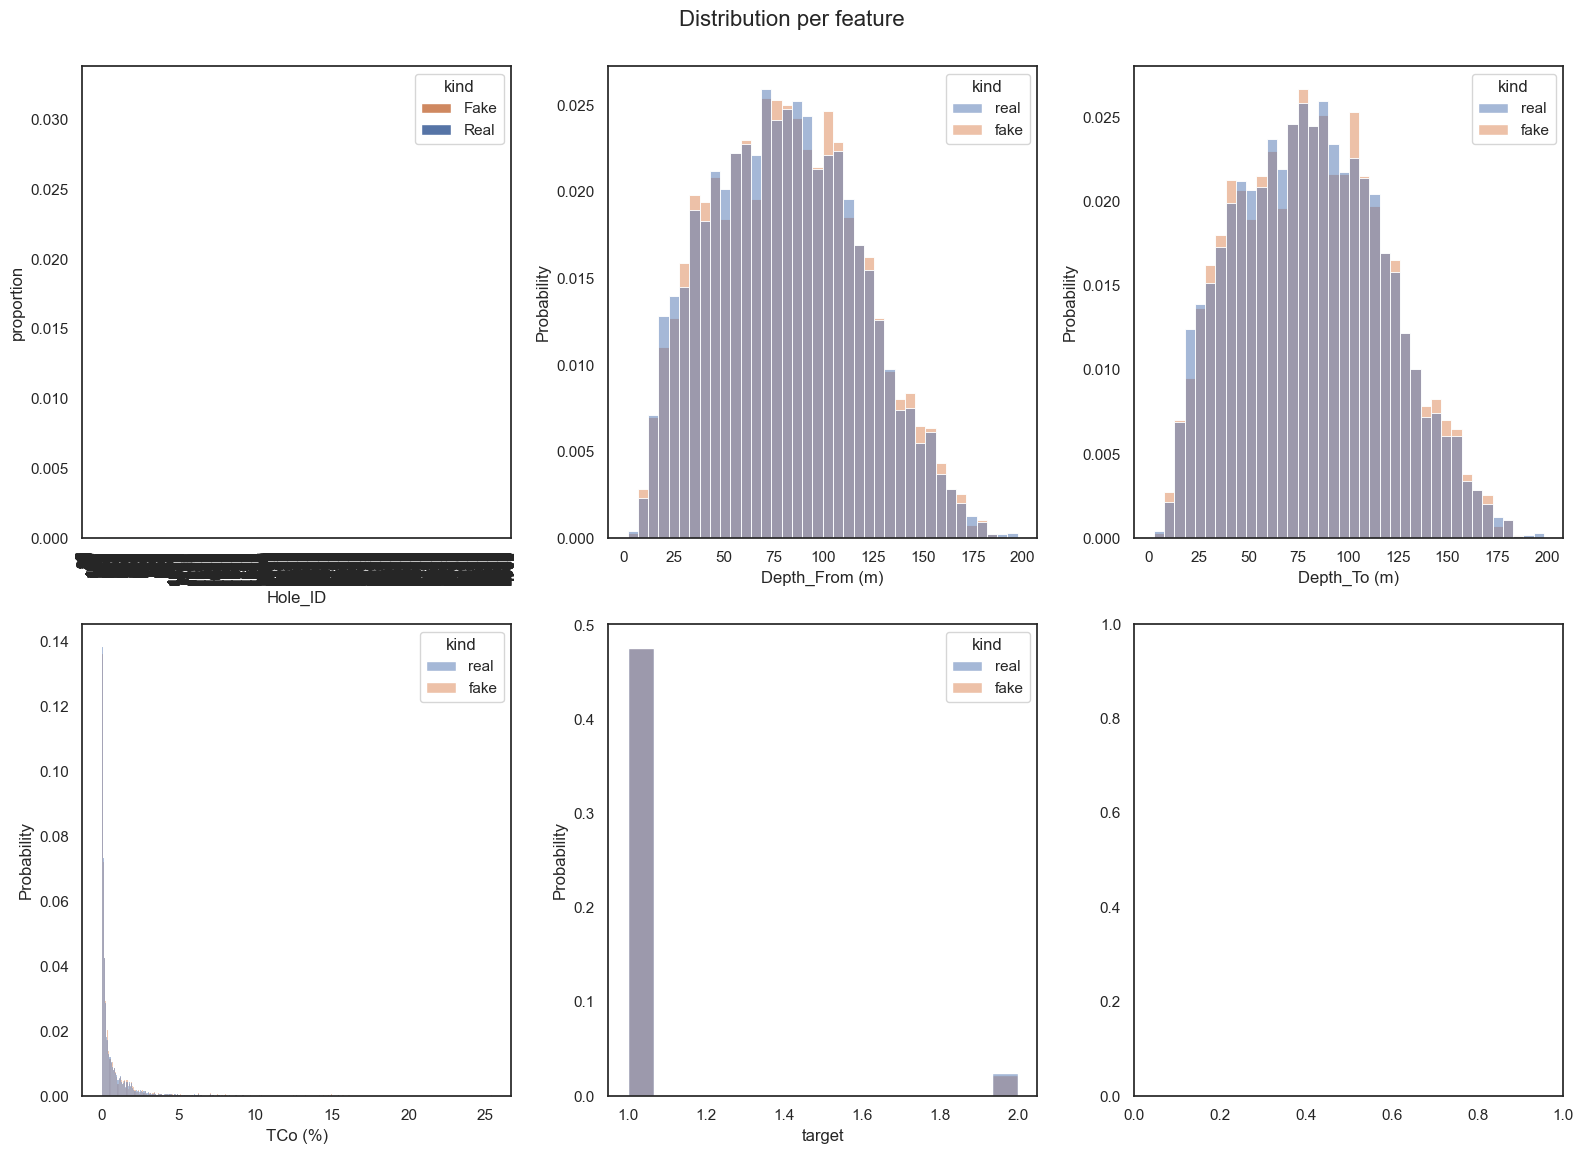

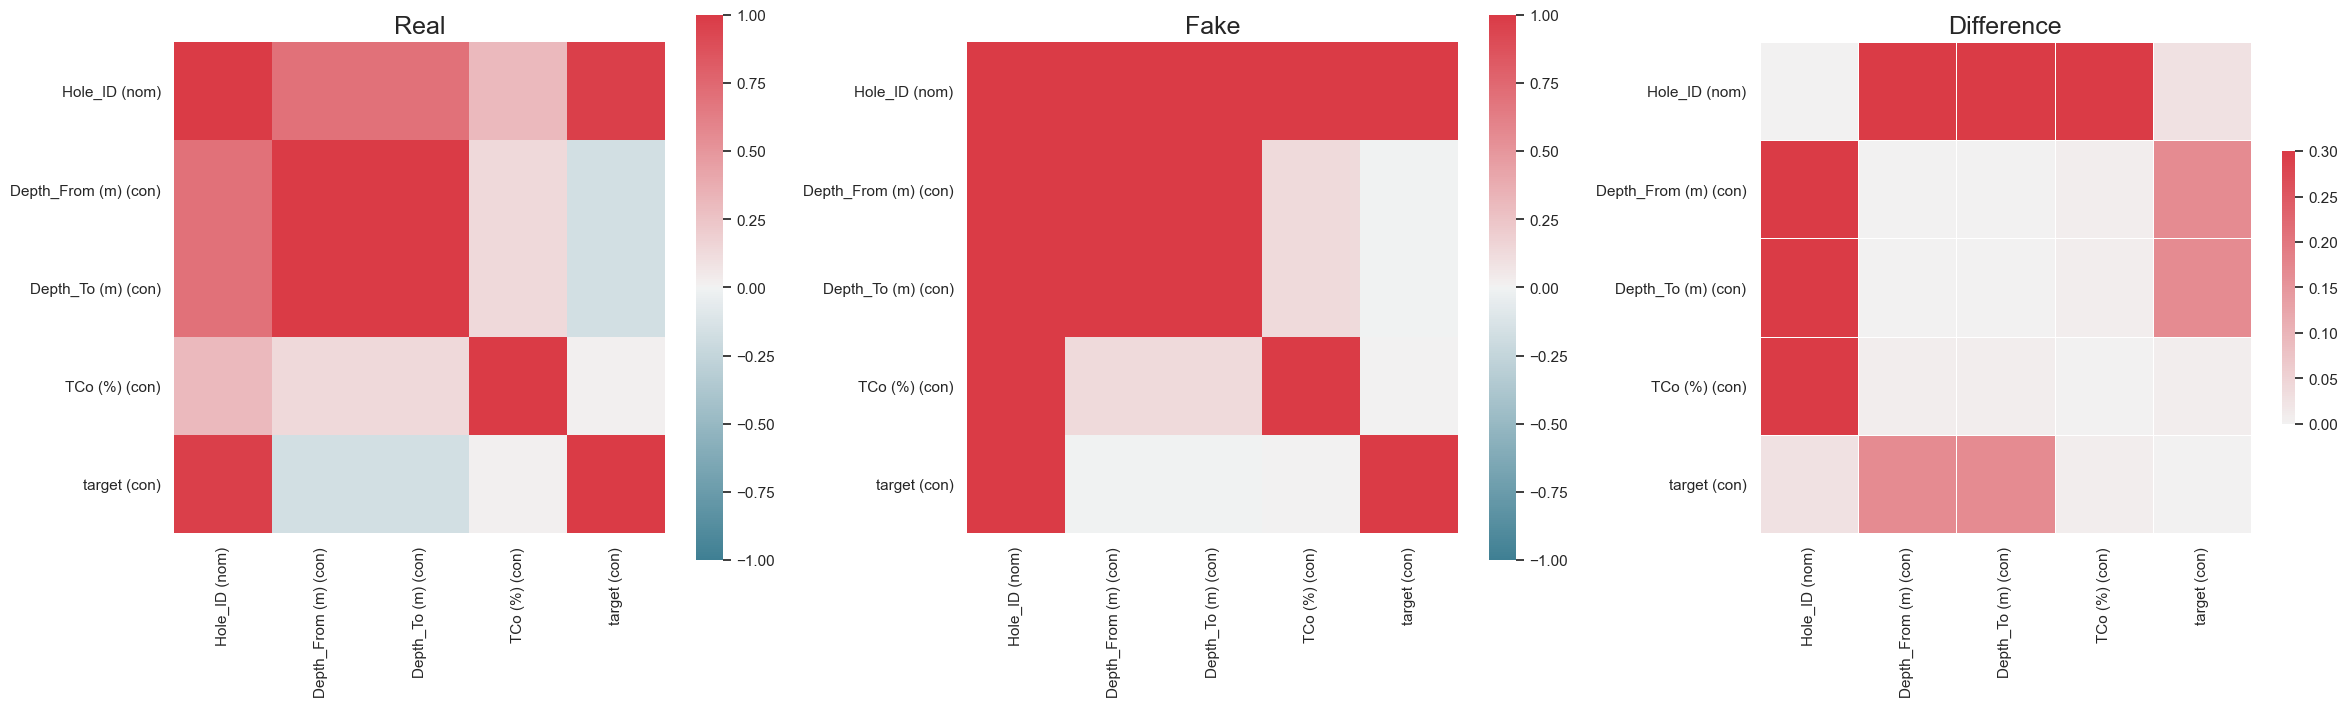

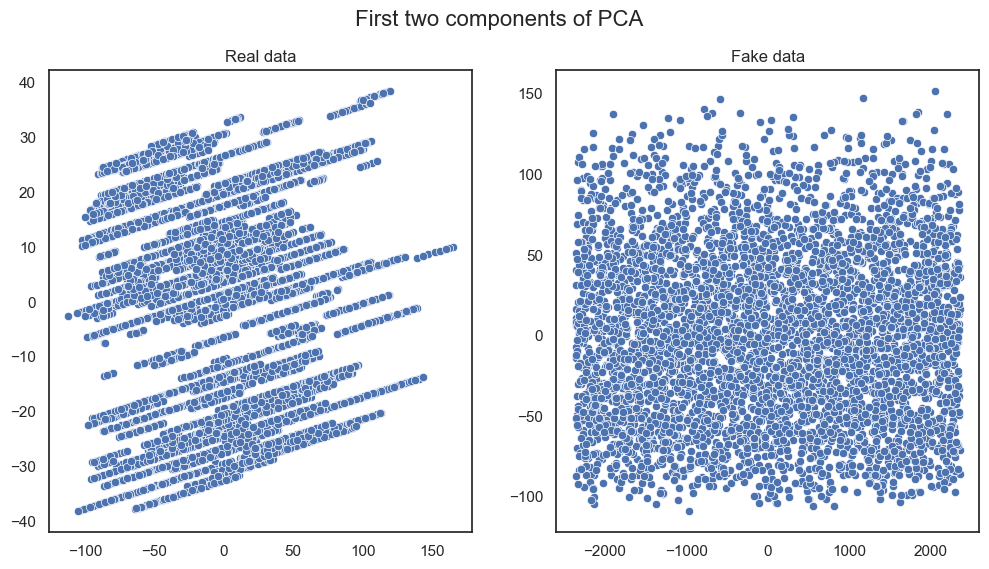

In [22]:
table_evaluator.visual_evaluation()

In [23]:
from sdv.evaluation import evaluate

evaluate(new_data, assay)

0.4947265210939156

In [24]:
from sdv.tabular import GaussianCopula

In [25]:
model = GaussianCopula(primary_key='Hole_ID',constraints=constraints,
                      field_distributions={'TCo (%)': 'beta'})
model.fit(assay)
new_data2 = model.sample(4717)
new_data2.head()

Sampling rows: 100%|██████████| 4717/4717 [00:00<00:00, 55383.02it/s]


,Hole_ID,Depth_From (m),Depth_To (m),TCo (%),target
0,a,154.7000,155.3000,0.0005,1
1,b,118.2000,119.0000,0.5140,1
2,c,28.2000,28.8000,0.0280,1
3,d,94.3000,95.0000,0.0330,1
4,e,133.5000,134.3000,0.0080,1


In [26]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(assay, new_data2)
table_evaluator.evaluate(target_col='target')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0328   0.9566              0.0194
DecisionTreeClassifier_real   1.0000   0.9057              0.8277
LogisticRegression_fake       0.0328   0.9809              0.0069
LogisticRegression_real       0.9968   0.9364              0.8749
MLPClassifier_fake            0.8856   0.9809              0.8154
MLPClassifier_real            0.9926   0.9364              0.8712
RandomForestClassifier_fake   0.0360   0.9809              0.0085
RandomForestClassifier_real   1.0000   0.9269              0.8638

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.8857
nearest neighbor std                     0.2375

Miscellaneous results:
                                  Result
Column Cor

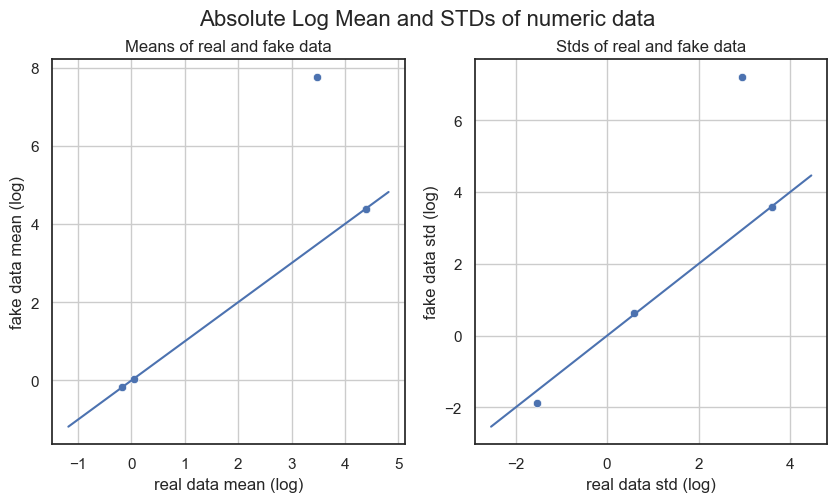

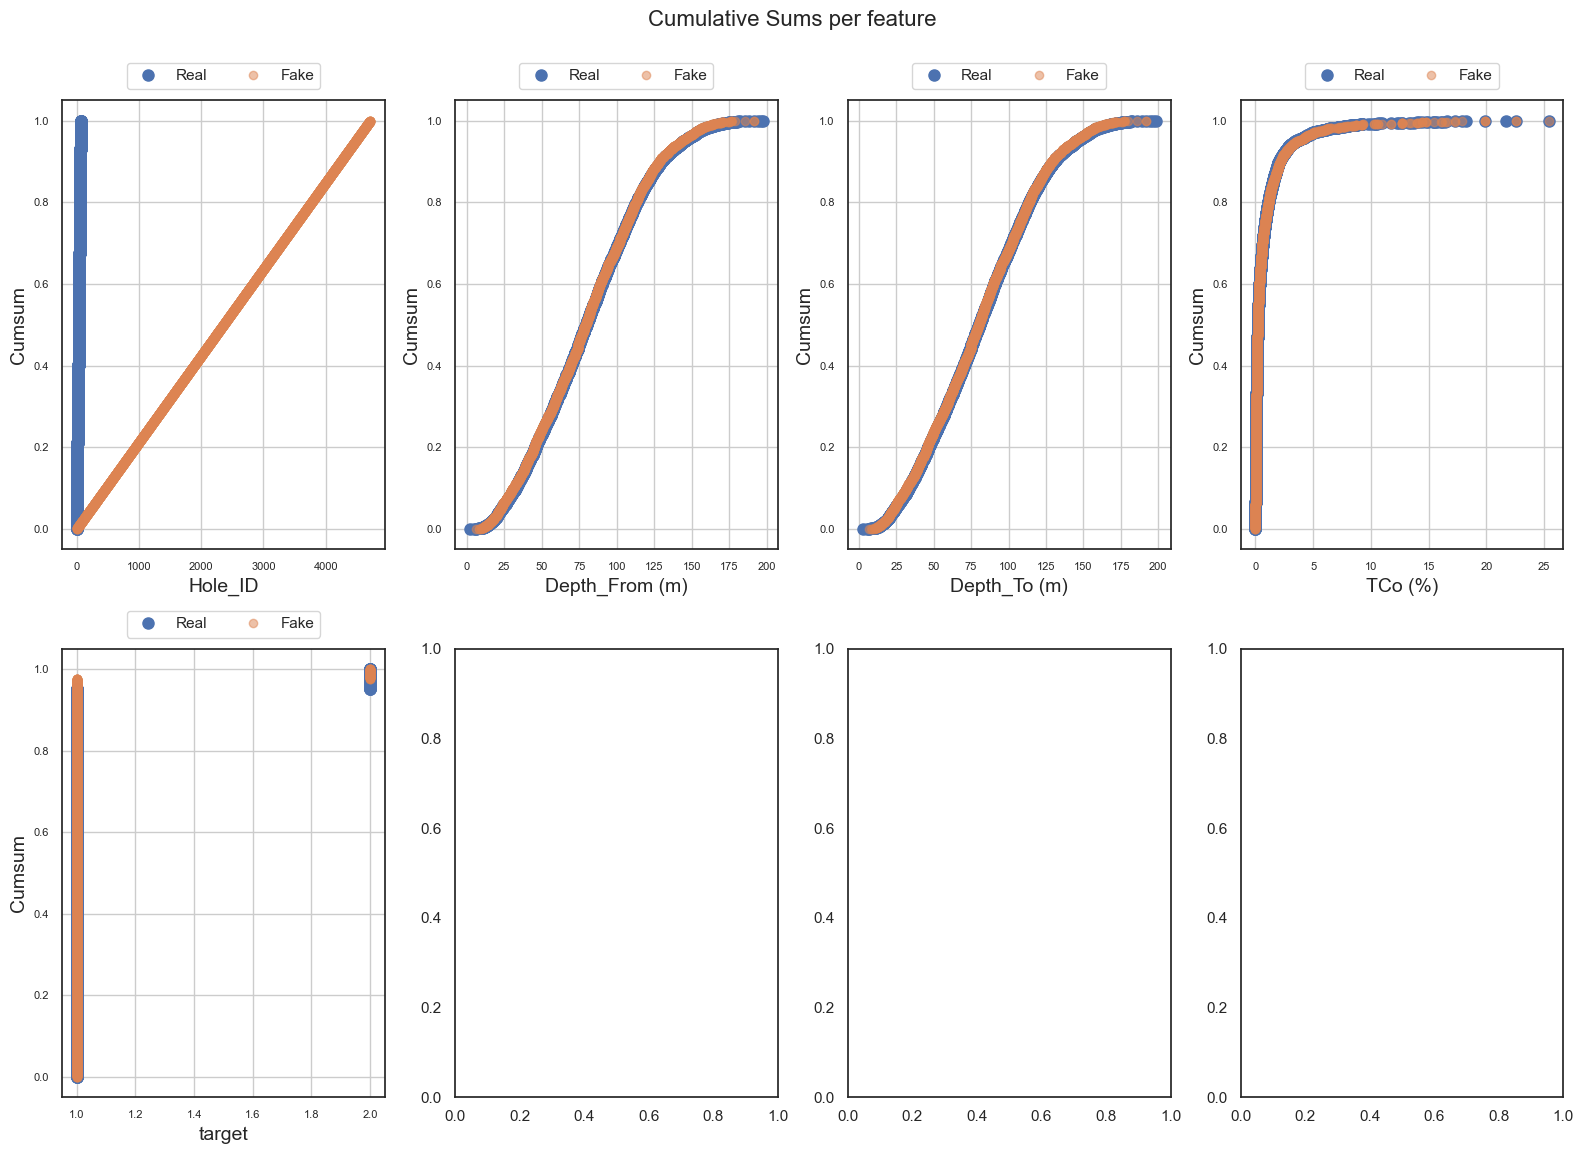

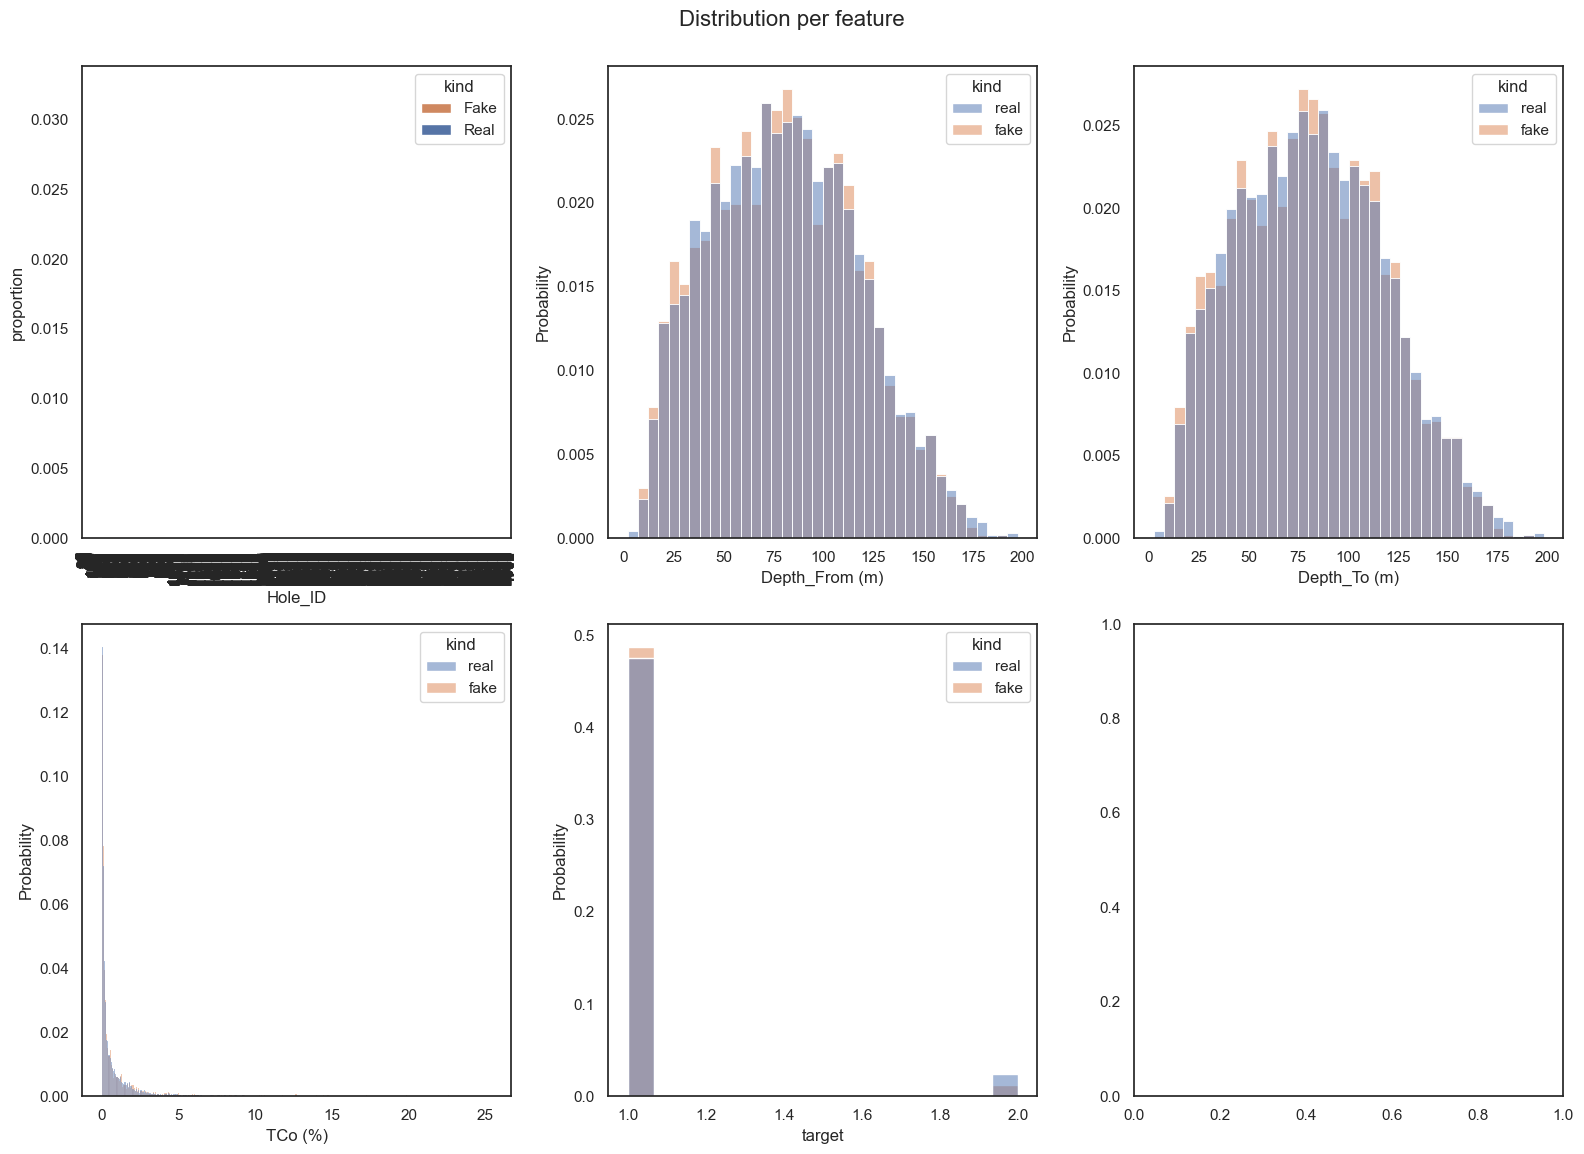

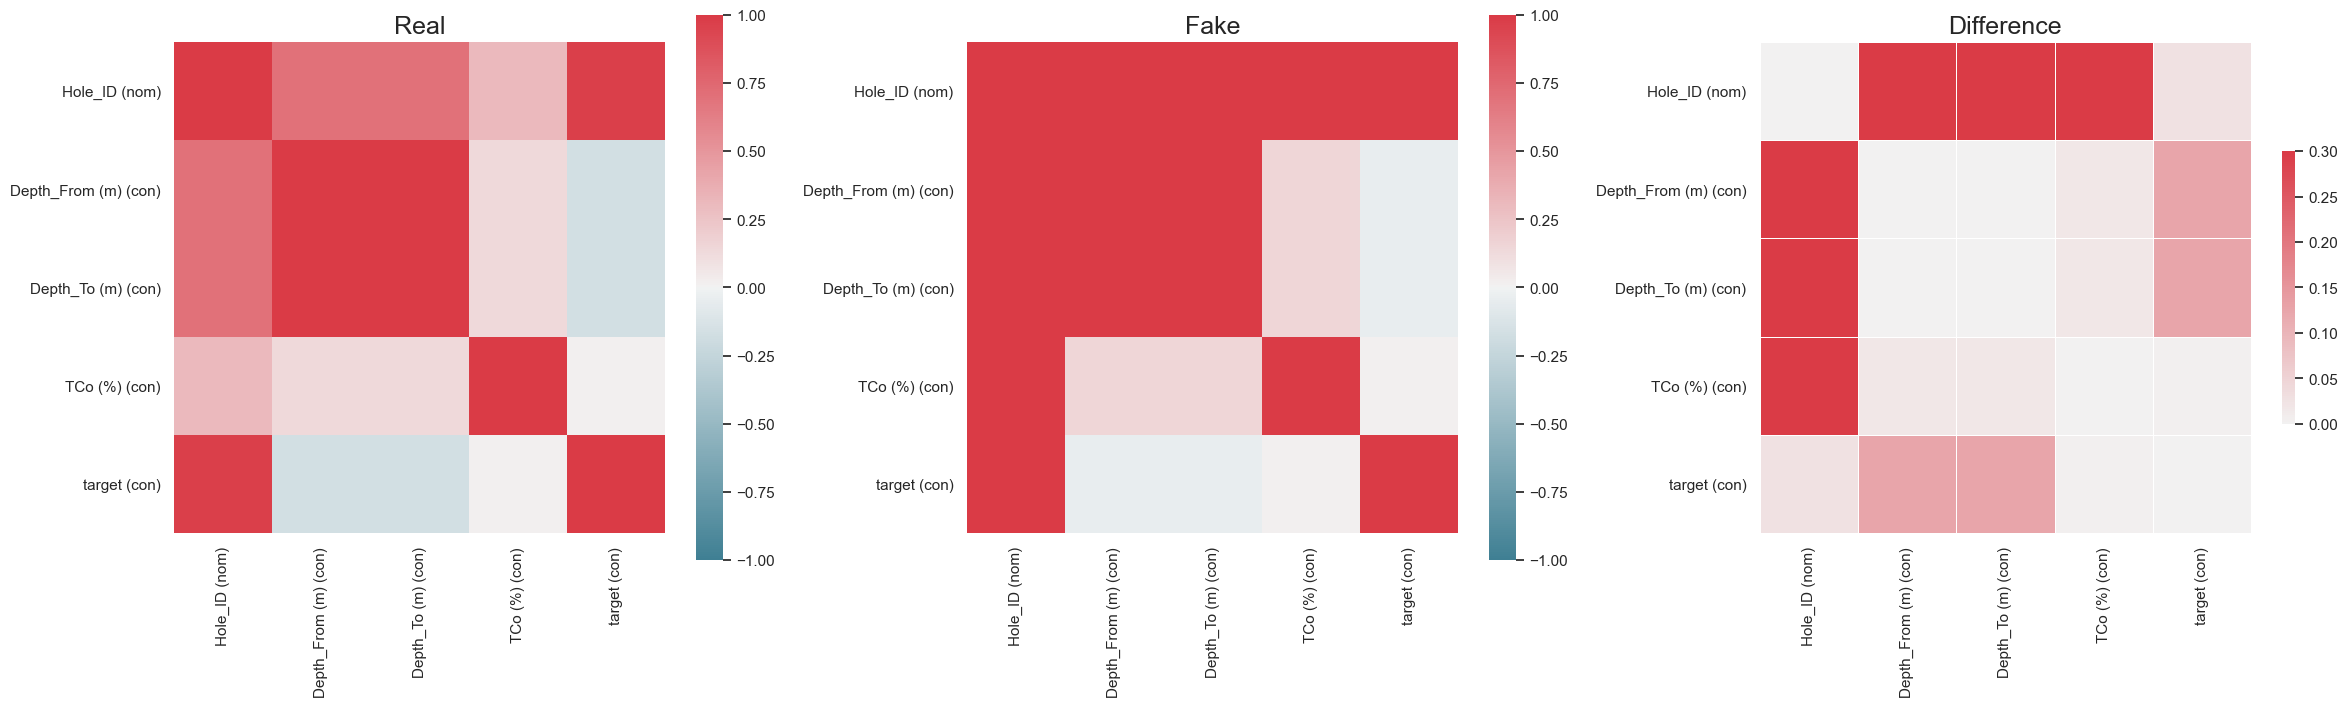

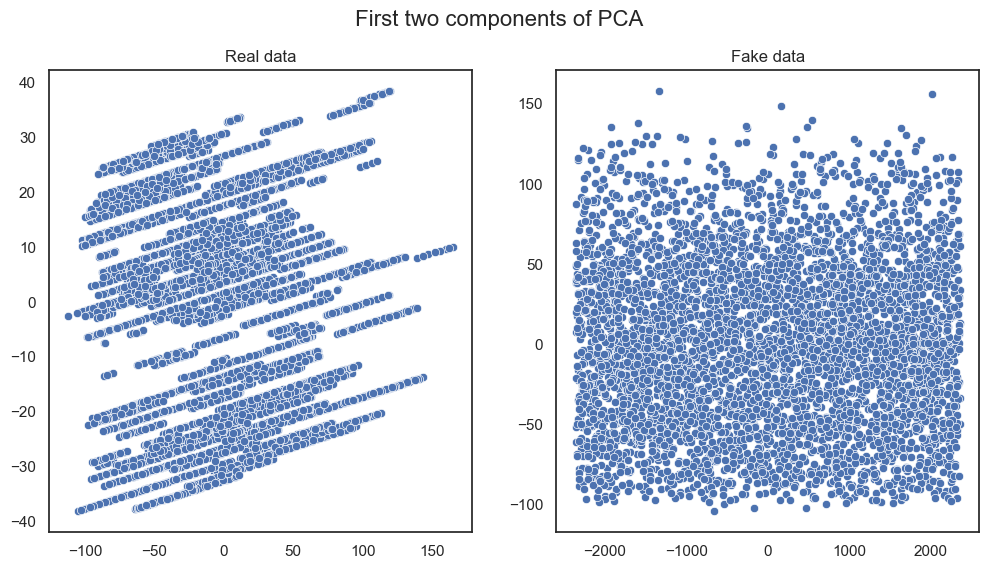

In [27]:
table_evaluator.visual_evaluation()

In [36]:
from sdv.sampling import Condition

In [37]:
conditions = Condition({'Hole_ID': 'a'}, num_rows=5)
conditions = pd.DataFrame({ 'Hole_ID': ['a', 'a', 'a', 'b', 'b', 'b']})
model.sample_remaining_columns(conditions)

Sampling remaining columns: 100%|██████████| 6/6 [00:00<00:00, 54.68it/s]


,Hole_ID,Depth_From (m),Depth_To (m),TCo (%),target
0,a,44.8000,45.5000,0.2830,1
1,b,136.2000,136.7000,1.2100,1
2,c,71.0000,71.8000,0.3740,1
3,d,73.5000,74.1000,1.7800,1
4,e,80.0000,81.0000,0.0110,1
5,f,42.5000,43.1000,0.7440,1


In [38]:
conditions['Hole_ID'].duplicated()

0    False
1     True
2     True
3    False
4     True
5     True
Name: Hole_ID, dtype: bool

In [39]:
print(conditions['Hole_ID'])

0    a
1    a
2    a
3    b
4    b
5    b
Name: Hole_ID, dtype: object


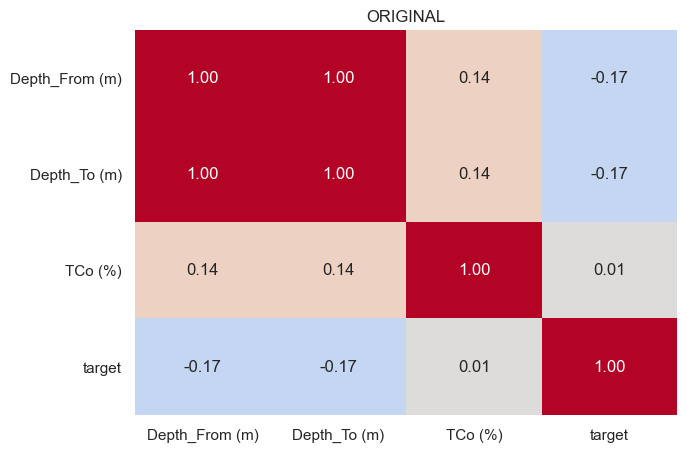

In [40]:
# Compute the correlation matrix
corr = assay.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('ORIGINAL')
plt.show()

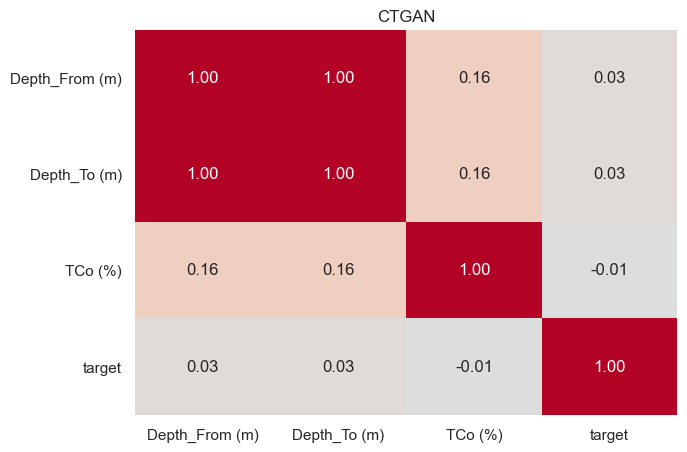

In [50]:
# Compute the correlation matrix
corr1 = new_assay.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr1, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('CTGAN')
plt.show()

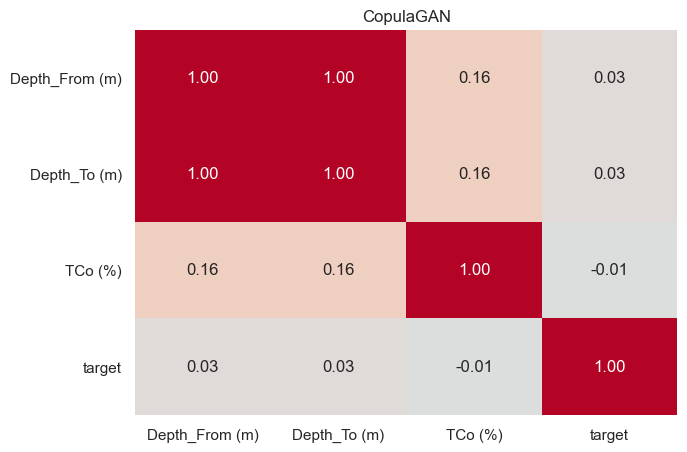

In [43]:
# Compute the correlation matrix
corr2 = new_data.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('CopulaGAN')
plt.show()

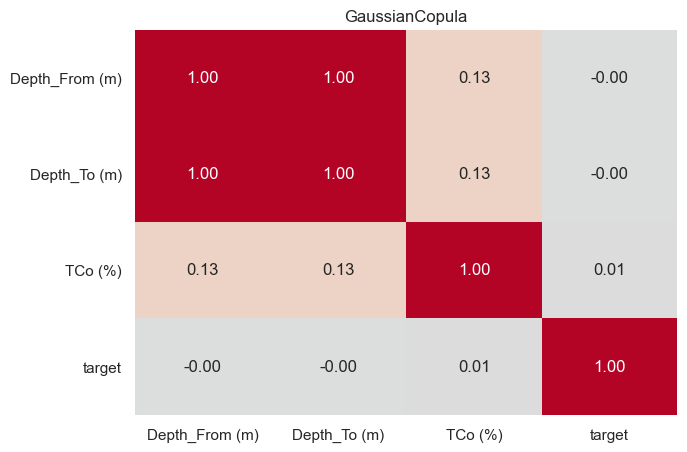

In [44]:
# Compute the correlation matrix
corr3 = new_data2.corr()

# Plot the correlation matrix using a heatmap with annotated values
plt.figure(figsize=(7, 5))
sns.heatmap(corr2, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1, cbar=False)
plt.title('GaussianCopula')
plt.show()

In [45]:
from scipy.stats import pearsonr

In [55]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr1 = corr1.values.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr1)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and CopulaGAN: ", percentage_corr, "%")

Percentage of correlation coefficient between original and CopulaGAN:  100.0 %


In [57]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr2 = corr2.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr2)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and CopulaGAN: ", percentage_corr, "%")

Percentage of correlation coefficient between original and CopulaGAN:  100.0 %


In [59]:
# Flatten the correlation matrices into 1-D arrays
corr = corr.flatten()
corr3 = corr3.values.flatten()

# Compute the Pearson correlation coefficient between the two 1-D arrays
r, p = pearsonr(corr, corr3)

# Calculate the percentage of correlation coefficient
percentage_corr = r * 100

# Print the percentage of correlation coefficient
print("Percentage of correlation coefficient between original and GaussianCopula: ", percentage_corr, "%")

Percentage of correlation coefficient between original and GaussianCopula:  99.79223844651924 %
